In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
df_train = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/EMONOBA/Dataset/emonoba_train_clean.xlsx')
df_val = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/EMONOBA/Dataset/emonoba_val_clean.xlsx')

In [19]:
df_train

,Data,Love,Joy,Surprise,Anger,Sadness,Fear
0,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ...,0,0,0,0,1,0
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬...,0,0,0,1,0,0
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0
4,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0
...,...,...,...,...,...,...,...
18415,সমস্যা নাই কি আমরা একদিন ক্রিকেট কে শাসন করবে...,0,1,0,0,0,0
18416,খানকিরপুলা তার মাকে গিয়ে বলে তর মাকে মনটা গিয়ে।,0,0,0,0,1,0
18417,ভাই চেয়ার কই🙄,0,0,1,0,0,0
18418,সবকয়টা তো একই গোয়ালের গাই,0,0,0,0,1,0


In [20]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [21]:
# Create a new column 'Emotion' based on the custom function
df_val['Label'] = df_val.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_test = df_val[['Data', 'Label']]

In [22]:
df_train.groupby("Label").describe()

Data                                                               
         count unique                                                top freq
Label                                                                        
Anger     3295   3293   এই অফিসে প্রয়োজনের তুলনায় কর্মী বেশি। কর্মী ছ...    2
Fear       162    162                          যদি গড় গ্রেড সি চলে আসে     1
Joy       6478   6449                                     খুব ভালো লাগল     5
Love      3786   3776                                    ছুঁয়ে দিলে মন     2
Sadness   3975   3974   কে সে? নিশ্চয়ই শয়তান জামাল! : না : তা হলে নিশ...    2
Surprise   724    724   তাদের প্রায় ইডিট কোটি ব্যবহারকারী অ্যাকাউন্ট ...    1

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [24]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [25]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [26]:
df_train.columns

Index(['Data', 'Label'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train["classes_bin"] = lb_make.fit_transform(df_train["Label"])
df_val["classes_bin"] = lb_make.fit_transform(df_val["Label"])
df_train[["classes_bin", "Label"]].head(11)

,classes_bin,Label
0,4,Sadness
1,4,Sadness
2,0,Anger
3,4,Sadness
4,2,Joy
5,3,Love
6,2,Joy
7,0,Anger
8,0,Anger
9,2,Joy


In [28]:
df_train

,Data,Label,classes_bin
0,লকাল বাস ভালো এটা থেকে,Sadness,4
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ...,Sadness,4
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬...,Anger,0
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,Sadness,4
4,সত্যিকার মানুষ তারাই ভাই,Joy,2
...,...,...,...
18415,সমস্যা নাই কি আমরা একদিন ক্রিকেট কে শাসন করবে...,Joy,2
18416,খানকিরপুলা তার মাকে গিয়ে বলে তর মাকে মনটা গিয়ে।,Sadness,4
18417,ভাই চেয়ার কই🙄,Surprise,5
18418,সবকয়টা তো একই গোয়ালের গাই,Sadness,4


In [29]:
df_train.groupby("Label").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
Label                                                  
Anger         3295.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Fear           162.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Joy           6478.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Love          3786.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
Sadness       3975.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
Surprise       724.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [30]:
df_train['Data'] = df_train['Data'].astype(str)
df_val['Data'] = df_val['Data'].astype(str)

In [31]:
df_train.dropna(inplace=True)

In [32]:
df_train

,Data,Label,classes_bin
0,লকাল বাস ভালো এটা থেকে,Sadness,4
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ...,Sadness,4
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬...,Anger,0
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,Sadness,4
4,সত্যিকার মানুষ তারাই ভাই,Joy,2
...,...,...,...
18415,সমস্যা নাই কি আমরা একদিন ক্রিকেট কে শাসন করবে...,Joy,2
18416,খানকিরপুলা তার মাকে গিয়ে বলে তর মাকে মনটা গিয়ে।,Sadness,4
18417,ভাই চেয়ার কই🙄,Surprise,5
18418,সবকয়টা তো একই গোয়ালের গাই,Sadness,4


In [33]:
train_text = df_train["Data"]
test_text= df_val["Data"]

In [34]:
train_counts = count_vect.fit_transform(train_text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(18420, 2947)

In [35]:
test_counts = count_vect.transform(test_text) # converting docs into vectors
test_tfidf  = test_counts 
test_tfidf = tfidf_transformer.transform(test_counts) # converting transformed vectors into tf-idf vectors
test_tfidf.shape

(2047, 2947)

In [36]:
X_train = train_tfidf
X_test = test_tfidf

y_train = df_train['classes_bin']
y_test = df_val["classes_bin"]

In [37]:
Y_pre = df_train['Label']
target_names = list(set(Y_pre))

In [38]:
target_names

['Surprise', 'Love', 'Anger', 'Joy', 'Sadness', 'Fear']

In [39]:
X_train

<18420x2947 sparse matrix of type '<class 'numpy.float64'>'
	with 94293 stored elements in Compressed Sparse Row format>

In [40]:
y_train

0        4
1        4
2        0
3        4
4        2
        ..
18415    2
18416    4
18417    5
18418    4
18419    0
Name: classes_bin, Length: 18420, dtype: int32

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [42]:
import seaborn as sn

# Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.4504152418172936
              precision    recall  f1-score   support

    Surprise       0.47      0.16      0.24       362
        Love       0.00      0.00      0.00        20
       Anger       0.43      0.85      0.57       743
         Joy       0.55      0.16      0.24       414
     Sadness       0.49      0.40      0.44       429
        Fear       0.00      0.00      0.00        79

    accuracy                           0.45      2047
   macro avg       0.32      0.26      0.25      2047
weighted avg       0.45      0.45      0.39      2047



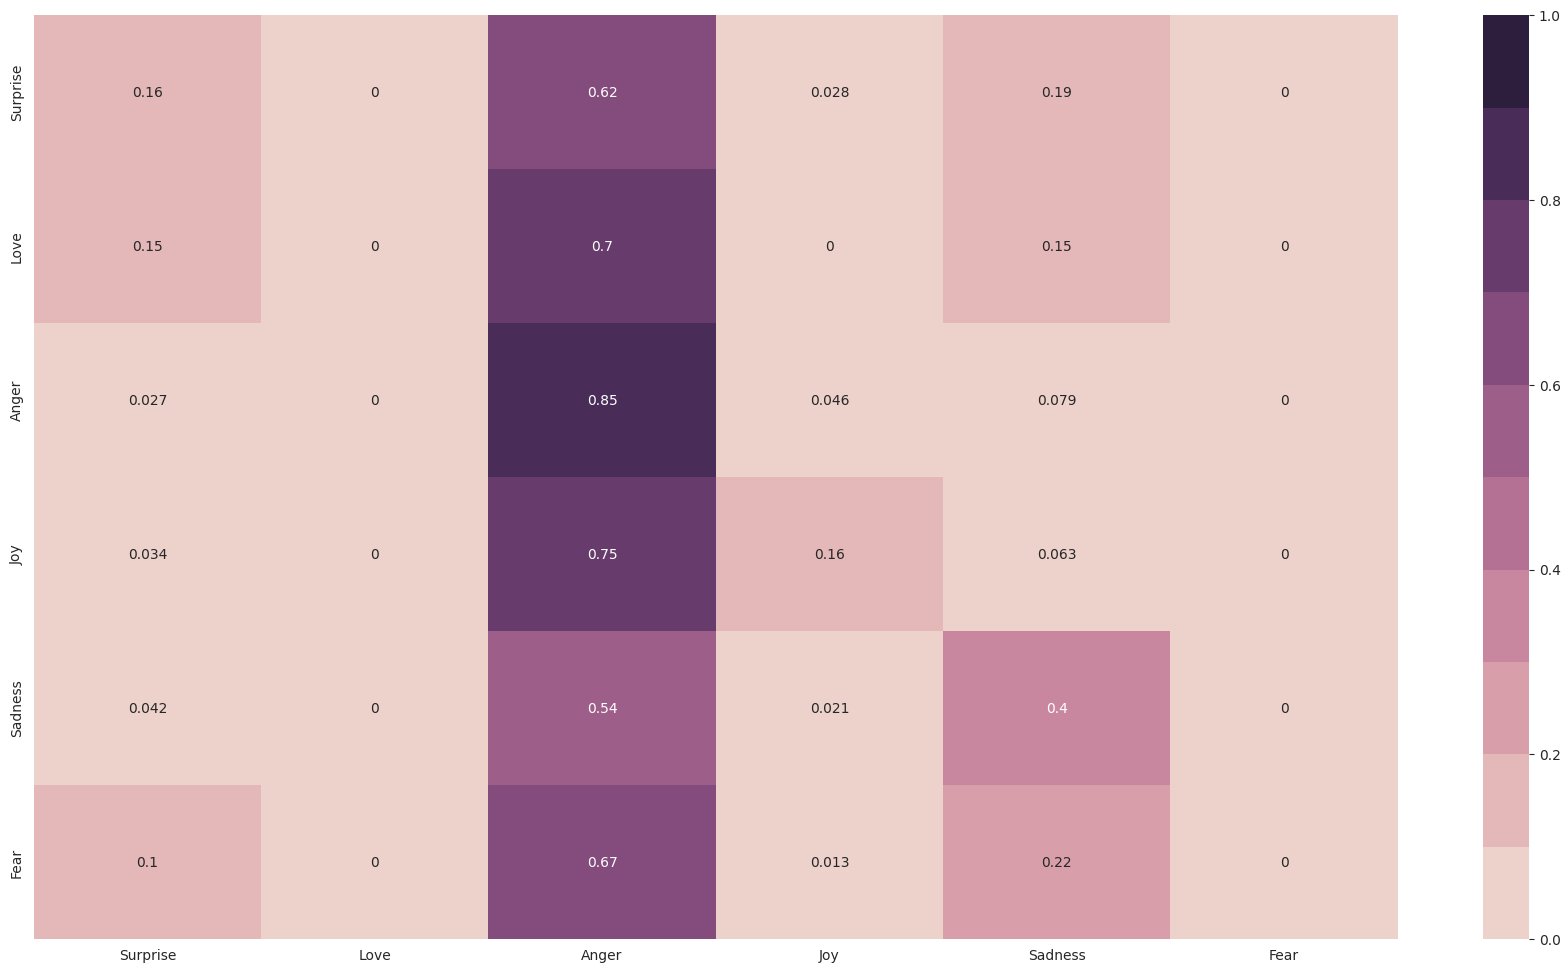

In [44]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [45]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [46]:
from sklearn.svm import SVC


Test set accuracy 0.4738641914997557
              precision    recall  f1-score   support

    Surprise       0.46      0.32      0.38       362
        Love       0.00      0.00      0.00        20
       Anger       0.46      0.70      0.56       743
         Joy       0.49      0.27      0.35       414
     Sadness       0.49      0.52      0.50       429
        Fear       0.67      0.03      0.05        79

    accuracy                           0.47      2047
   macro avg       0.43      0.30      0.31      2047
weighted avg       0.48      0.47      0.45      2047



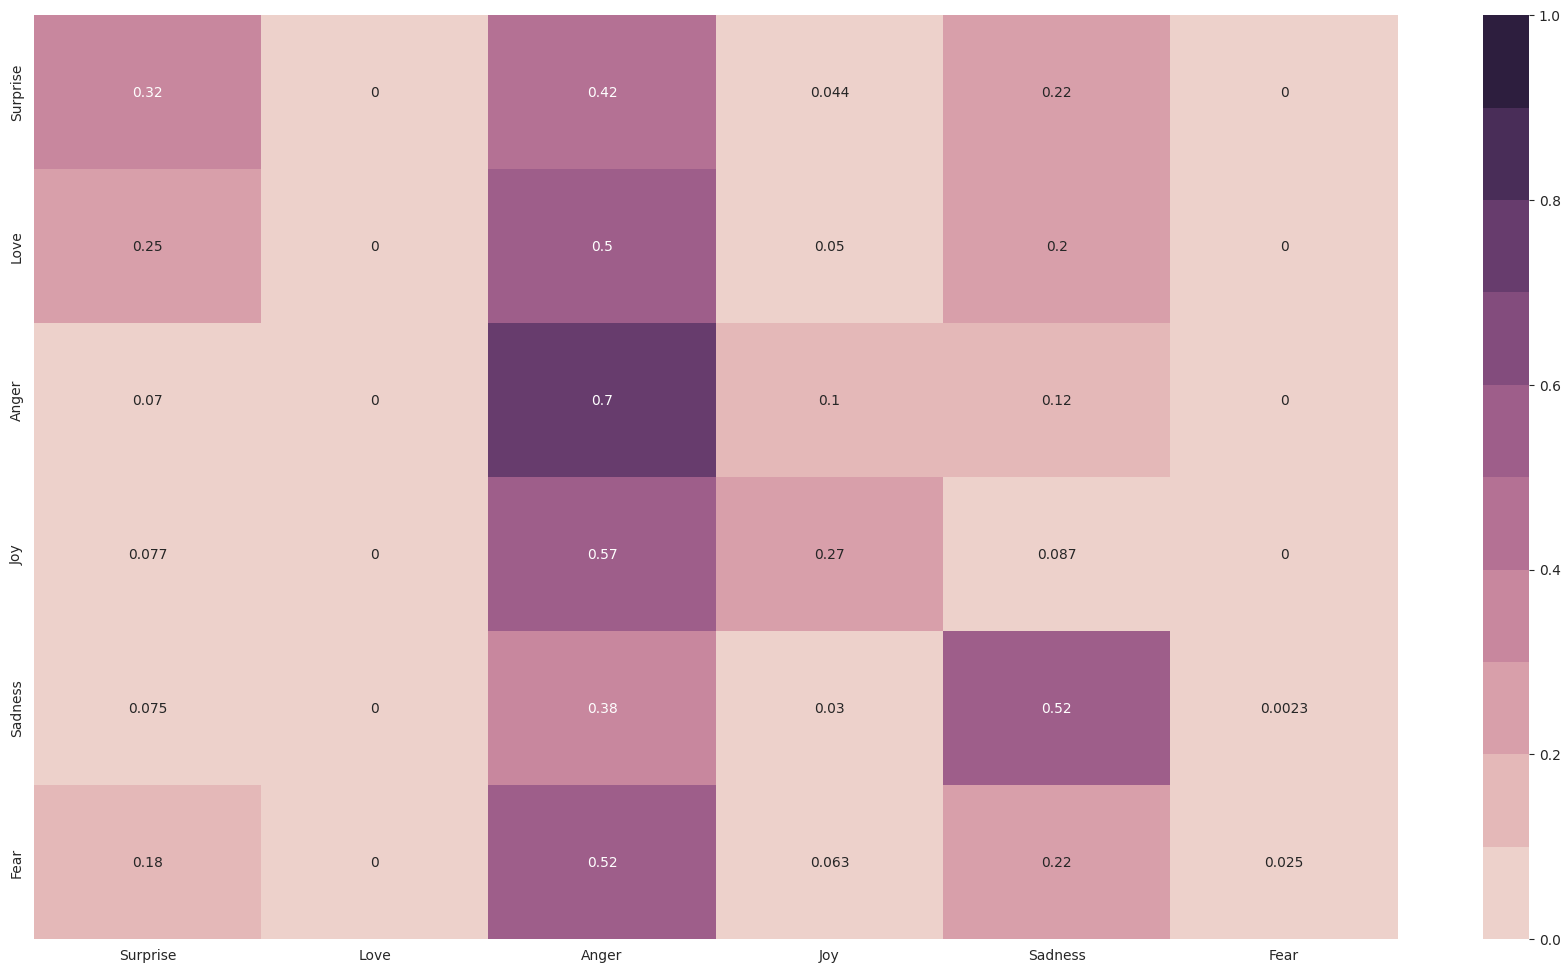

In [47]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [48]:
from xgboost import XGBClassifier

Test set accuracy 0.45530043966780653
              precision    recall  f1-score   support

    Surprise       0.43      0.27      0.33       362
        Love       0.00      0.00      0.00        20
       Anger       0.45      0.71      0.55       743
         Joy       0.46      0.28      0.34       414
     Sadness       0.50      0.43      0.46       429
        Fear       0.40      0.05      0.09        79

    accuracy                           0.46      2047
   macro avg       0.37      0.29      0.30      2047
weighted avg       0.45      0.46      0.43      2047



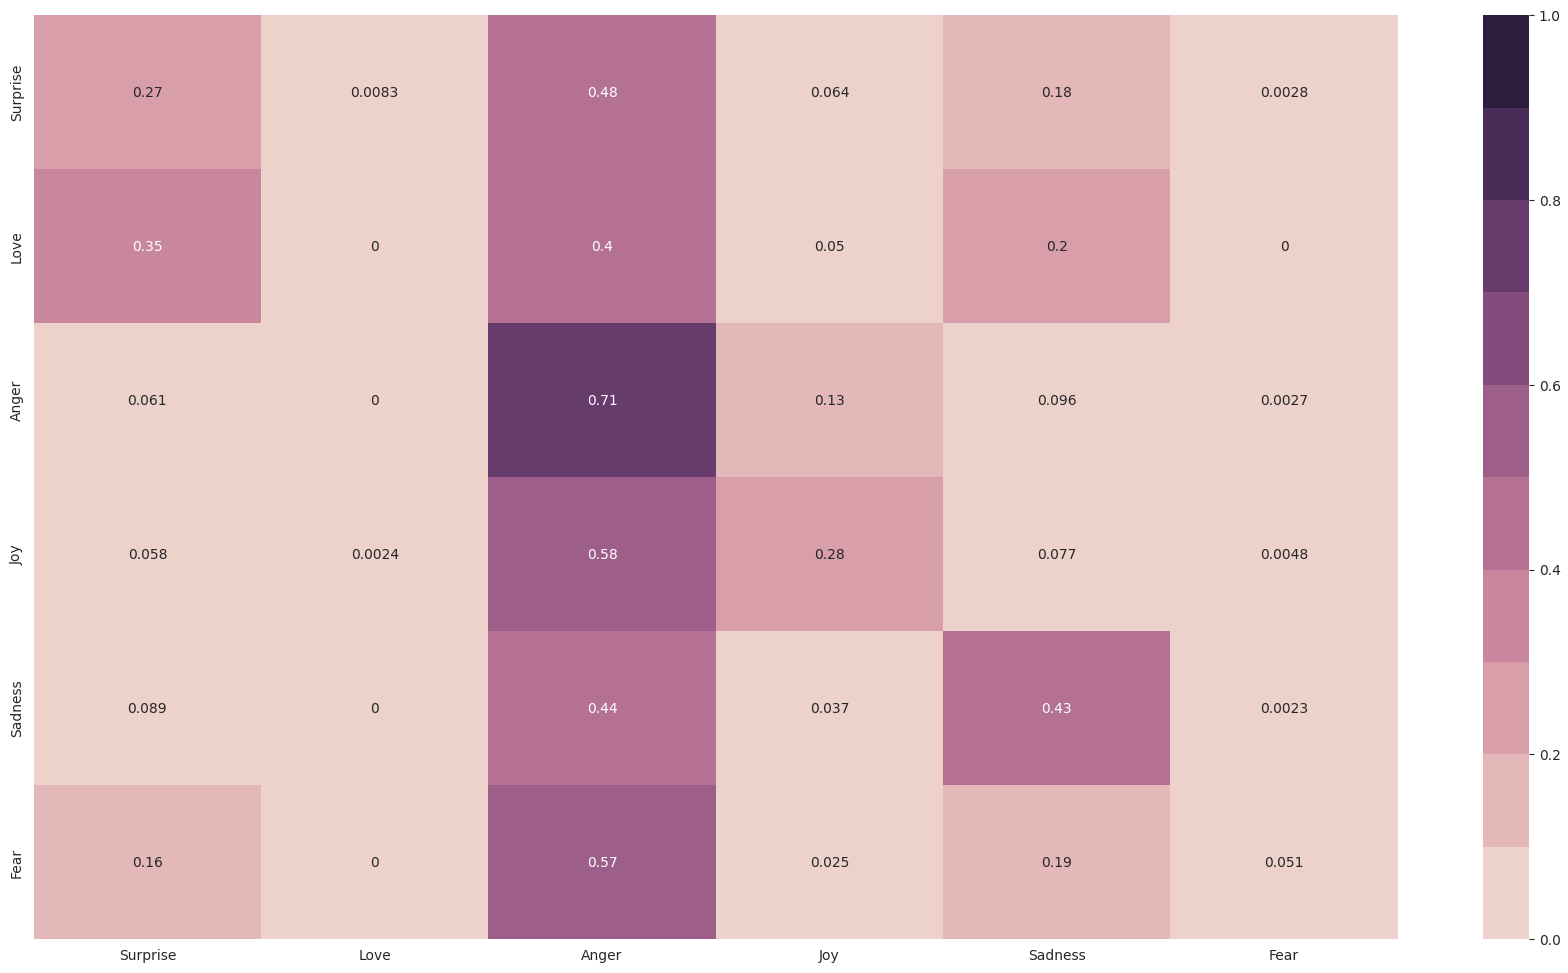

In [49]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.44357596482657546
              precision    recall  f1-score   support

    Surprise       0.41      0.29      0.34       362
        Love       0.00      0.00      0.00        20
       Anger       0.45      0.68      0.54       743
         Joy       0.40      0.22      0.29       414
     Sadness       0.47      0.48      0.48       429
        Fear       0.27      0.04      0.07        79

    accuracy                           0.44      2047
   macro avg       0.33      0.28      0.28      2047
weighted avg       0.43      0.44      0.42      2047



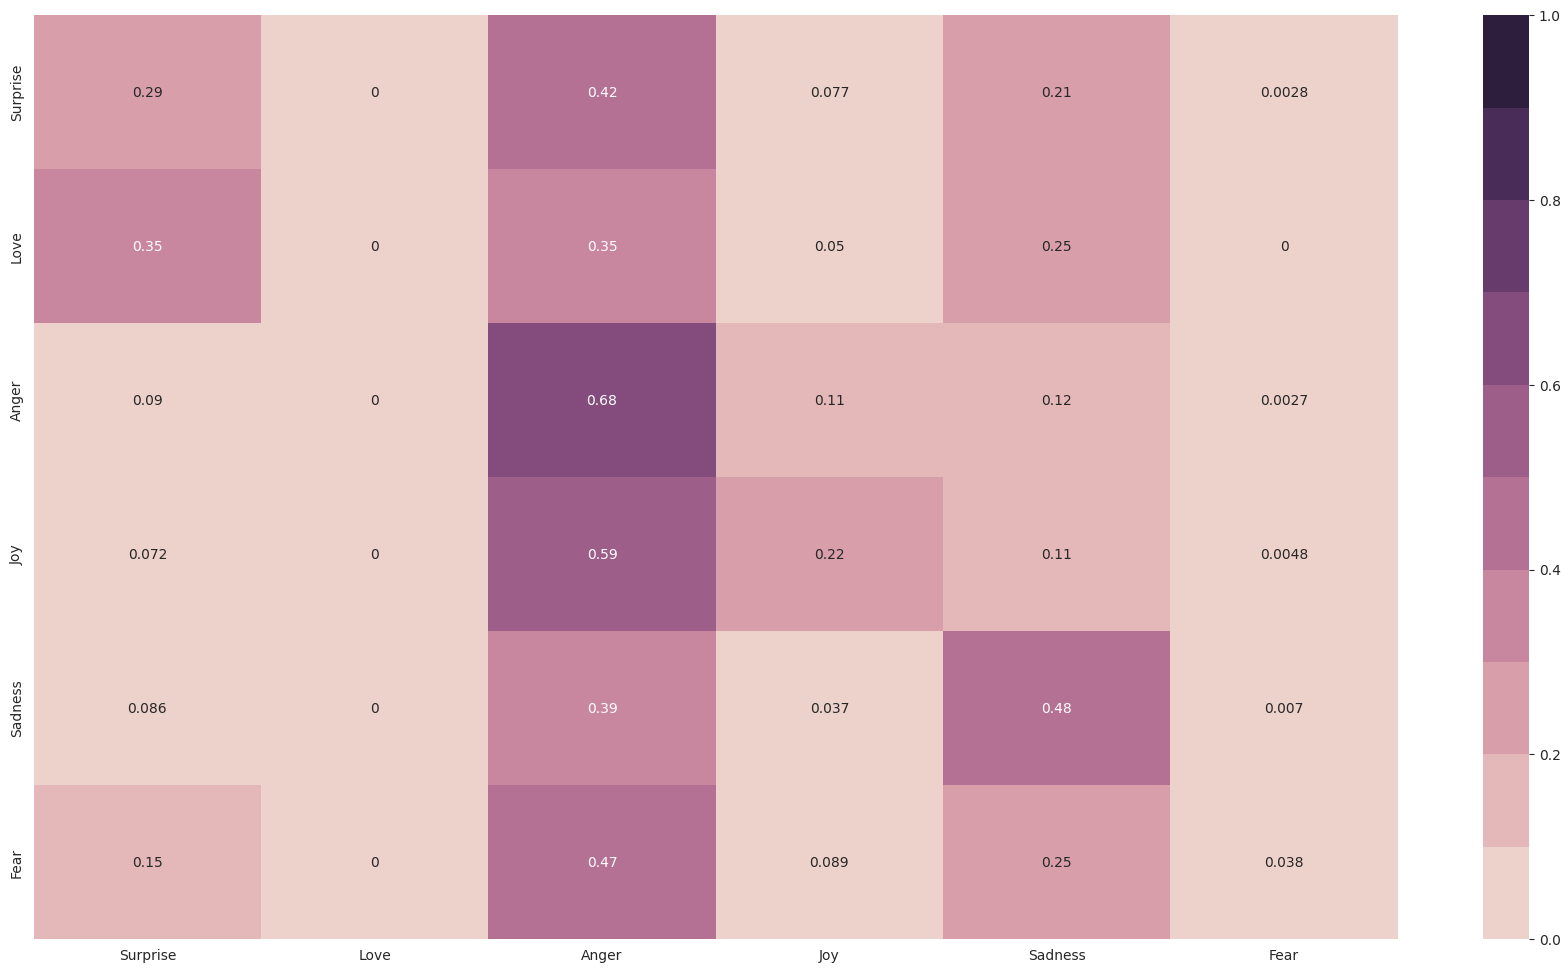

In [51]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  